CWS Solutions

Exercise 2

The total exit rate of monomers from the CSF ($h_2=r_{21}+r_{23}+L_2$) is the sum of the respective rates monomomers move from the CSF to the brain ($r_{21}$ and from CSF to plasma ($r_{23}$), these being added to the loss of monomers in the brain by degration ($L_2$).

Exercises 3.

Treatment 2 shows that the plasma and CSF levels of amyloid-beta monomers might increase, but the level in the brain actually decreases.

Exercise 4

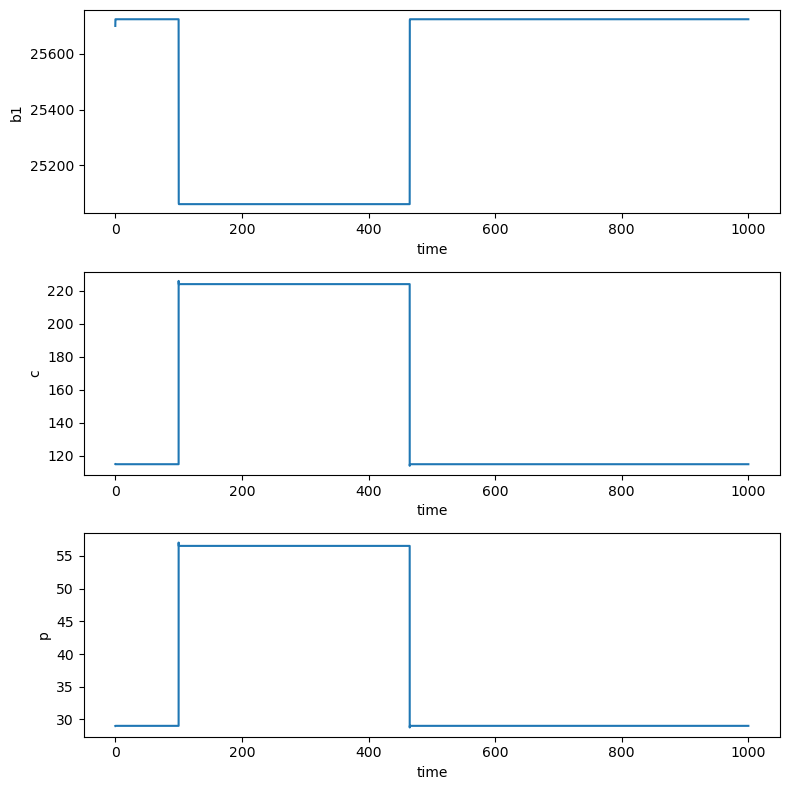

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    b1, c,p = y      # unpack current values of y
    k1,k2,k3, r12,r13,r23,r21,r31,r32,L1,L2,L3,E,F,S = params  # unpack parameters
    derivs = [k1+F*S+r31*p+r21*c-(r13*b1+r12*b1*(1+np.heaviside(t-100,0)-np.heaviside(t-465,0)))-(L1+E*S)*b1-2*E*b1**2,      # list of dy/dt=f functions
             k2+r12*b1*(1+np.heaviside(t-100,0)-np.heaviside(t-465,0))+r32*p-(r21*c+r23*c)-L2*c,
             k3+r13*b1+r23*c-(r31*p+r32*p)-L3*p]
    return derivs

# Parameters
k1 = 7.34*86400         
L1 = 24 
k2=0
L2=0
k3=0
L3=6.7*10**(-3)*86400   
r12=7.6*10**(-6)*86400   
r23=1.7*10**(-3)*86400   
r31=3.7*10**(-5)*86400   
r32=0
r21=0
r13=0
E=0
F=.238
S=0

# Initial values
b10 = 25.7*(10**3)     
c0 = 115
p0 = 29

# Bundle parameters for ODE solver
params = [k1,k2,k3, r12,r13,r23,r21,r31,r32,L1,L2,L3,E,F,S]

# Bundle initial conditions for ODE solver
y0 = [b10,c0,p0]

# Make time array for solution
tStop = 1000
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot b1 as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('b1')

# Plot c as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('c')

# Plot p as a function of time
ax3 = fig.add_subplot(313)
ax3.plot(t, psoln[:,2])
ax3.set_xlabel('time')
ax3.set_ylabel('p')
plt.savefig("treatment2nonlin.png")
plt.tight_layout()
plt.show()

The A𝛽 concentration in the brain during treatment 2 decreases by 2.5% while the concentrations in the CSF and plasma both roughly double (in agreement with Figure 6 b-d in [Craft et. al. 2002]).

Note:  Craft, Wein and Selkoe [2002] considered two other treatments:

<ul>
<li>A fragmentation enhancer increasing
    the fragmentation rate 100\%; and </li>

<li>A vaccine which increases the monomer ingestion
 rate off of polymers by 100\%.</li>

In both these cases, the dynamics in all three
compartments were similar.


### Conclusion

After simulating a variety of treatment scenarios, Craft, Wein and
Selkoe concluded the need for caution about the use of A$\beta$ as a
biomarker. As exemplified by Treatment 1 and 2, relative changes in
the A$\beta$ levels are not uniform in all three compartments under
all treatments. The affects of a particular treatment on the model parameters
must be understood in order to correctly interpret
clinical changes in a patient's CSF and plasma A$\beta$ levels.

Craft, Wein and Selkoe observe, for the case where the polymerization ratio
satisfies $r>1$, that though the values in Table 1 give $r \sim
.84$ and a total steady-state polymer concentration $S\sim
1950$x10$^3$ pM, theoretically speaking, if $r>1$, the steady state
polymer concentration $S$ becomes infinite. This implies that while
the steady state brain monomer concentration $b_1$ (which is
independent of $r$) remains finite or is even reduced by some
treatment, the total brain polymer concentration
$S=\sum_{i=2}^{\infty} b_i$ may increase without bound as each
polymer concentration $b_i$ approaches its finite steady state level
(see Figure 5 in [Craft et. al. 2002]).




## Exercises 


1. The equilibrium analysis for Equation (2) of the CWS Model shown in this notebook is conducted for $i=2$. Since $i$ is the length of polymers, it is possible for $i$ to equal 2, 3, 4, .... Using Equation (2) in the CWS Model, write what the equation used for equilibrium analysis of Equation (2) would be when $i=3$.
2. Repeat the process done in Exercise (1) for $i=4$. 

## References

Calhoun, M., Burgermeister, P., Phinney, A., Stalder, M.,
Tolnay, M., Wiederhold, K.-H., Abramowski, D., Sturchler-Pierrat,
C., Sommer, B., Staufenbiel, M. ad Jucker, M. 1999. Neurol
overexpression of mutant amyloid pre-cursor protein results in
prominent deposition of cerebrovascular amyloid. <i>Neurobiology</i>
96, 14088-14093.


Craft, D., Wein, L. and Selkoe,D. 2002.  Mathematical model of the
impact of novel treatments of the A$\beta$ burden in the Alzheimer's
brain, CSF and plasma, <i>Bulletin of Mathematical Biology</i>, 64,
1011-1031.

Das, R. et. al. 2011. Modelling effect of a $\gamma$-Secratase
inhibitor on amyloid-$\beta$ dynamics reveals significant role of an
amyloid clearance mechanism, <i>Bulletin of Mathematical Biology</i>, 73,
230-247.

Edekstein-Keshet, L. 2006.  Simple models for polymer growth:
implications for biopolymers, available at
https://people.ok.ubc.ca/rtyson/Teaching/Math225/polymerize.pdf

Felsenstein, K. 2000. The next generation of AD therapeutics:
the future is now. <i>Abstracts from the 7th annual conference on
Alzheimer's Disease and Related Disorders</i>, Abstract 613.

Galasko, D. et. al. 1998. High cerebrospinal fluid tau and low
amyloid $\beta42$ levels in the clinical diagnosis of Alzheimer
disease and relation to Apolipoprotein E genotype, <i>Archives of
Neurology</i>, 55, 937-945.

Ghersi-Egea, J.-F., Gorevic, P., Ghiso, J., Frangione, B.,
Patlak, C., Fenstermacher, J. 1996. Fate of cerbral spinal
fluid-borne amyloid $\beta$-peptide: rapid clearance into blood and
aprepciable accumulation by cerebral arteries. <i>Journal of
Neurochemistry</i>, 166, 880-883.

Jackson, J. 1957. "Networks of waiting lines" <i>Operations
Research</i>, 5, pp. 518-521.

Johns H. and King L. 2011. "Larry King Interviews Harry Johns, President of the Alzheimer's Association."  in the CNN special program <i>Larry
King Investigates Alzheimers.</i> Available at
http://www.alzheimersreadingroom.com/2011/05/harry-johns-larry-king-investigates.html

Luca, M., Chavex-Ross, A, Edelestein-Keshet, L. and Mogilner A. 2003.
Chemotactic signaling, microglia, and Alzheimer's disease
senile plaques: is there a connection?, <i>Bulletin of
Mathematical Biology</i>,, 65, 693-730.</i>

McLean, C., Cherny, R., Fraser, F., Fuller, S., Smith, M.,
Beyreuther, K., Bush, A., Masters, C. 1999. Soluble pool of A$\beta$
amyloid as a determinant of severity of neurodegeneration in
Alzheimer's Disease. <i>Annals of Neurology</i>, 46, 860-866.

N$\ddot{a}$slund, J., Haroutunian, V., Mohs, R., Davis, K.,
Davies, P., Greengard, P., Buxbaum, J. 2000. Correlation between
elevated levels of amyloid $\beta$-peptide in the brain and
cognitive decline. <i>The Journal of the American Medical
Association}, 283, 1571-1577.</i>

Scheuner, D. et. al. 1996. <i>Nature Medicine</i>, 2, 864-870.

Schnoor, Jerald L. 1996. <i>Environmental Modeling; Fate and Transport of Pollutants
in Water, Air, and Soil</i>, New York: John Wiley & Sons.

Thiess, W. 2010. Regarding ADNI Biomarkers Article from
<i>Archives of Neurology</i> August 2010.

 Zlokovic, B., Ghiso, J., Mackic, J., McComb, J., Weiss, M. and
Frangione, B. 1993. Blood-brain barrier transport of circulating
Alzheimer's amyloid $\beta$, <i>Biochemical and Biophysical
Research Communications</i>, 197, 1034-1040.


